In [2]:
# All the imports needed

# Data Manipulation
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Train Test Split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

#Models

#Shallow:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Deep Neural Networks:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [3]:
#Reading csv file
car = pd.read_csv('/kaggle/input/used-cars-in-saudi-arabia/used_car_cleaned.csv')

# EDA & Feature Engineering

In [4]:
#Checking the head of the data
car.head()

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
0,Hyundai,Tucson,83491.0,Automatic,2018,64000.0
1,Chevrolet,Trailblazer,222000.0,Automatic,2009,20000.0
2,Great,Wall,0.0,Automatic,2022,135000.0
3,Ford,Fusion,178000.0,Automatic,2012,23000.0
4,Mitsubishi,Attrage,10500.0,Automatic,2020,32000.0


In [5]:
#Check datatypes & null values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_brand         2287 non-null   object 
 1   car_model         2287 non-null   object 
 2   car_driven        2287 non-null   float64
 3   car_transmission  2287 non-null   object 
 4   car_model_year    2287 non-null   int64  
 5   car_price         2287 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 107.3+ KB


<AxesSubplot:>

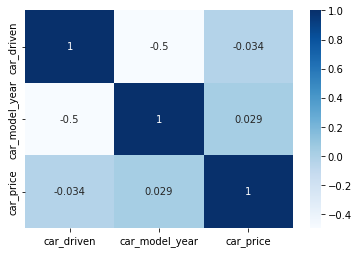

In [6]:
#Heatmap of correlations
sns.heatmap(car.corr(),annot=True,cmap='Blues')

<Figure size 504x864 with 0 Axes>

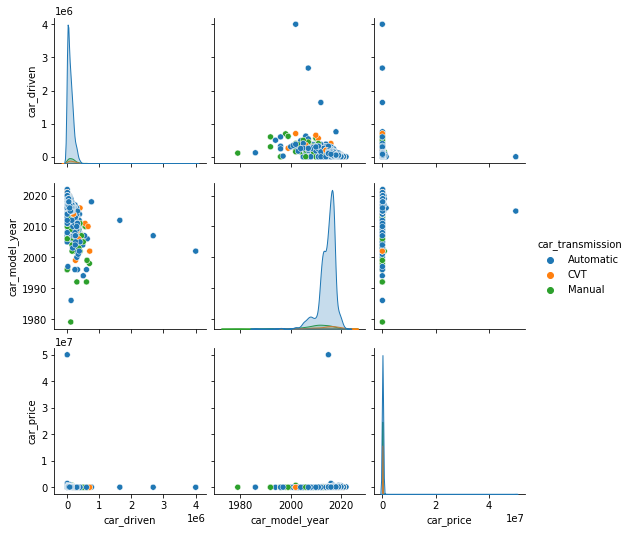

In [7]:
#Pairplot for the whole data based on the car transmission
plt.figure(figsize=(7,12))
sns.pairplot(data=car,hue='car_transmission')

### Car Price Outliers

In [8]:
#Cars with price over 500k
car.loc[car['car_price'] > 500000]

,car_brand,car_model,car_driven,car_transmission,car_model_year,car_price
1800,Nissan,ZX300,150000.0,Manual,2002,750000.0
1802,Audi,A4,12.0,Automatic,2015,50000000.0
1831,Toyota,Land,75000.0,Automatic,2016,1000000.0
1865,Chevrolet,Tahoe,17000.0,Automatic,2015,550000.0
2062,Lexus,LX,1092.0,Automatic,2016,1450000.0
2112,Lexus,LX,0.0,Automatic,2020,600000.0
2115,Bentley,Bentayga,5000.0,Automatic,2019,700000.0
2151,Hyundai,Tucson,40900.0,Automatic,2017,700000.0


In [9]:
#Dealing with car price outliers using boxplot
car = car[car['car_price'] < 1000000]
car[car['car_price'] > 250000] = car['car_price'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='car_price'>

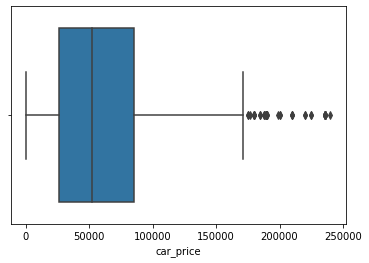

In [10]:
sns.boxplot(data=car,x='car_price')

### Car Mileage Outliers

In [11]:
#Dealing with car mileage outliers using boxplot
car = car[car['car_driven'] < 500000]
car[car['car_driven'] > 350000] = car['car_driven'].mean()

<AxesSubplot:xlabel='car_driven'>

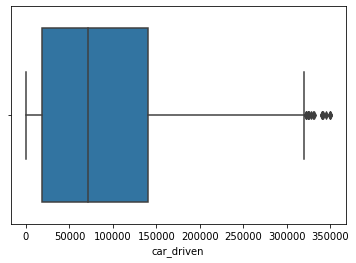

In [12]:
sns.boxplot(data=car,x='car_driven')

### Exploring Brands and models

<AxesSubplot:xlabel='count', ylabel='car_brand'>

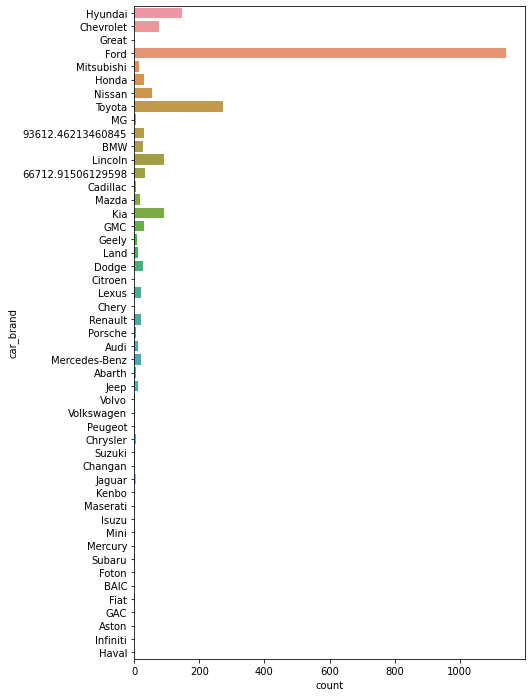

In [13]:
#Counting the number of cars by brand
plt.figure(figsize=(7,12))
sns.countplot(y=car['car_brand'])

In [14]:
#Counting the number of each transmission type
car['car_transmission'].value_counts()

Automatic            2013
Manual                123
CVT                    68
66712.91506129598      33
93612.46213460845      29
Name: car_transmission, dtype: int64

In [15]:
#Replacing strange values with the mode
car['car_transmission'].replace(66712.91506129598,'Automatic',inplace=True)
car['car_transmission'].replace(93612.46213460845,'Automatic',inplace=True)

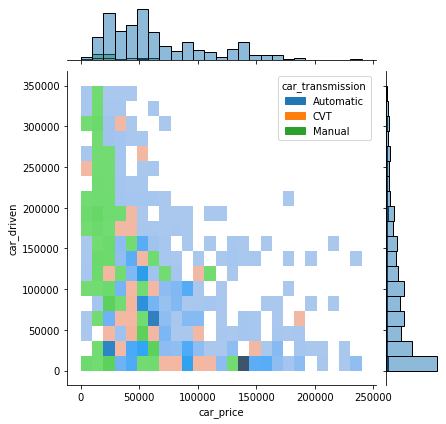

In [16]:
#Comparing price & mileage based on transmission
sns.jointplot(data=car,x='car_price',y='car_driven',hue='car_transmission',kind='hist')

<AxesSubplot:xlabel='car_price', ylabel='car_price'>

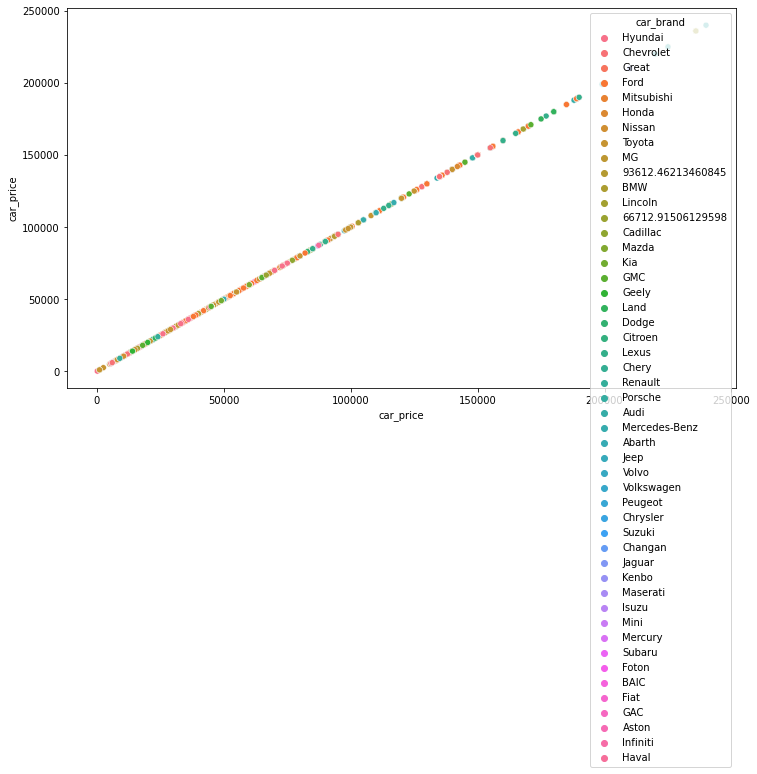

In [17]:
#Comparing car price based on the brand
plt.figure(figsize=(12,7))
sns.scatterplot(data=car,x='car_price',y='car_price',hue='car_brand')

### One-Hot Encoding

In [18]:
#One hot encoding by using get dummies
car = pd.get_dummies(car)

### Choosing features & label

In [19]:
X = car.drop('car_price',axis=1) #Features
y = car['car_price'] #Label

### Scaling the data

In [20]:
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### Train Test Split

In [21]:
# split the data to 30% test,70% train with random state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training models

# Random Forest Regressor

In [22]:
rfr = RandomForestRegressor(n_estimators=180,max_features='auto',min_samples_leaf=1,
                                min_samples_split=2,random_state=42)
rfr.fit(X_train,y_train)
rfrpred = rfr.predict(X_test)
rfrmae = mean_absolute_error(y_test,rfrpred)
rfrrmse = np.sqrt(mean_squared_error(y_test,rfrpred))
rfrr2 = r2_score(y_test, rfrpred)
print('MAE = ' + str(rfrmae))
print('RMSE = ' + str(rfrrmse))
print('R2 = ' + str(rfrr2))

MAE = 5714.109654219219
RMSE = 14622.370801633668
R2 = 0.8808526309018999


# KNN

In [23]:
knn = KNeighborsRegressor(n_neighbors=4,p=2)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
knnmae = mean_absolute_error(y_test,knnpred)
knnrmse = np.sqrt(mean_squared_error(y_test,knnpred))
knnr2 = r2_score(y_test, knnpred)

print('MAE = ' + str(knnmae))
print('RMSE = ' + str(knnrmse))
print('R2 = ' + str(knnr2))

MAE = 8822.505882352942
RMSE = 20383.62004475761
R2 = 0.7684677446062842


# SVR

In [24]:
svr = SVR(C=600,gamma=0.1,kernel='linear')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrmae = mean_absolute_error(y_test,svrpred)
svrrmse = np.sqrt(mean_squared_error(y_test,svrpred))
svmr2 = r2_score(y_test, svrpred)

print('MAE = ' + str(svrmae))
print('RMSE = ' + str(svrrmse))
print('R2 = ' + str(svmr2))

MAE = 16960.69922185678
RMSE = 26279.474088380193
R2 = 0.6151582232205639


# Decision Tree

In [25]:
dt = DecisionTreeRegressor(max_depth=None , min_samples_split=2, random_state=42)
dt.fit(X_train,y_train)
dtpred = dt.predict(X_test)
mean_absolute_error(y_test,dtpred)
dtmae = mean_absolute_error(y_test,dtpred)
dtrmse = np.sqrt(mean_squared_error(y_test,dtpred))
dtr2 = r2_score(y_test, dtpred)

print('MAE = ' + str(dtmae))
print('RMSE = ' + str(dtrmse))
print('R2 = ' + str(dtr2))

MAE = 6591.525
RMSE = 18516.82324119308
R2 = 0.8089346943893352


# DNN

In [26]:
# Stop training when a monitored quantity has stopped improving
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [48]:
model = Sequential()

model.add(Dense(267,activation='relu'))
model.add(Dense(267,activation='relu'))
model.add(Dense(267,activation='relu'))
model.add(Dense(267,activation='relu'))
model.add(Dense(267,activation='relu'))
model.add(Dense(267,activation='relu'))

model.add(Dense(1))

#Using MAE as loss function
model.compile(optimizer='adam',loss='mean_absolute_error')

In [49]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=500,
          validation_data=(X_test, y_test.values),
          verbose=1,
          batch_size=128,
          callbacks=[early_stop]
          )

Epoch 1/500
13/13 [==============================] - 1s 22ms/step - loss: 65545.9219 - val_loss: 60350.5234
Epoch 2/500
13/13 [==============================] - 0s 11ms/step - loss: 62169.1602 - val_loss: 46558.8086
Epoch 3/500
13/13 [==============================] - 0s 11ms/step - loss: 43556.0547 - val_loss: 31689.9023
Epoch 4/500
13/13 [==============================] - 0s 11ms/step - loss: 32106.0488 - val_loss: 24859.8320
Epoch 5/500
13/13 [==============================] - 0s 11ms/step - loss: 25796.1543 - val_loss: 22189.9492
Epoch 6/500
13/13 [==============================] - 0s 11ms/step - loss: 22444.6699 - val_loss: 20311.9805
Epoch 7/500
13/13 [==============================] - 0s 12ms/step - loss: 19805.9551 - val_loss: 18768.3887
Epoch 8/500
13/13 [==============================] - 0s 11ms/step - loss: 17323.9980 - val_loss: 17538.8301
Epoch 9/500
13/13 [==============================] - 0s 11ms/step - loss: 15291.6592 - val_loss: 16477.6953
Epoch 10/500
13/13 [========

# DNN Evaluation

<AxesSubplot:>

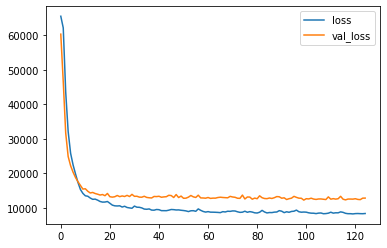

In [50]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [51]:
predictions = model.predict(X_test)

In [52]:
#Evaluation
print('MAE = ' + str(mean_absolute_error(y_test,predictions)))
print('RMSE = ' + str(np.sqrt(mean_squared_error(y_test,predictions))))
print('R^2 = ' + str(r2_score(y_test,predictions)))
print('Explained Variance Score = ' + str(explained_variance_score(y_test,predictions)))

MAE = 12803.248706469101
RMSE = 22672.05986134146
R^2 = 0.7135618693909451
Explained Variance Score = 0.7139236370876378


# Testing the model

In [35]:
cartest = car.drop('car_price',axis=1).iloc[1]

In [36]:
#Scaling and reshaping the data
cartest = scaler.transform(cartest.values.reshape(-1, 266))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
# RealPrice
car.iloc[1]['car_price']

20000.0

In [38]:
# Predicted Price using (Random Forest Regressor)
testprice = rfr.predict(cartest) 
testprice[0]

19743.61111111111

In [39]:
# Difference Between Real & Predicted Price
difference =  car.iloc[1]['car_price'] - testprice[0]
difference

256.3888888888905